<a href="https://colab.research.google.com/github/Goodjorx/jobbarcelona22/blob/main/Insects_JobBarcelona22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from fastai.basics import *
from fastai.tabular import * 


import numpy as np
import scipy
from scipy.stats import normaltest
from scipy import pi
from scipy.fftpack import fft
from scipy.signal import spectrogram, cwt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.style as style
import seaborn as sns

from sklearn.manifold import TSNE, SpectralEmbedding, Isomap, MDS
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingRegressor, BaggingClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
# from tsai.all import *
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## EDA

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Insects_Hackathon/train.csv', index_col=0)
df.head(5)

,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
0,22,26,119.910995,242.838324,-316.819222,250.195048,-53.547777,-112.049983,2
1,10,16,-90.790536,-269.470767,-182.581844,95.394941,37.291944,48.525180,0
2,21,42,-20.028003,-147.070212,50.280872,-90.750386,-50.476556,85.399009,1
3,21,17,-21.258567,0.467070,-86.164153,-21.813529,-209.256006,16.291882,0
4,18,16,-58.154501,-13.051195,-156.501167,48.392938,-110.008860,-10.285138,2


In [ ]:
df.shape, df.columns

((7001, 9),
 Index(['Hour', 'Minutes', 'Sensor_alpha', 'Sensor_beta', 'Sensor_gamma',
        'Sensor_alpha_plus', 'Sensor_beta_plus', 'Sensor_gamma_plus', 'Insect'],
       dtype='object'))

In [ ]:
df.isnull().sum()

Hour                 0
Minutes              0
Sensor_alpha         0
Sensor_beta          0
Sensor_gamma         0
Sensor_alpha_plus    0
Sensor_beta_plus     0
Sensor_gamma_plus    0
Insect               0
dtype: int64

In [ ]:
print(f"Number of insects 0 --> {df.loc[df['Insect']==0].shape[0]}\n")
print(f"Number of insects 1 --> {df.loc[df['Insect']==1].shape[0]}\n")
print(f"Number of insects 2 --> {df.loc[df['Insect']==2].shape[0]}\n")
print(f">"*50)
print(f"\nInsect 0 represents a --> {(df.loc[df['Insect']==0].shape[0]) / df.shape[0]*100 }\n")
print(f"Insect 1 represents a --> {(df.loc[df['Insect']==1].shape[0]) / df.shape[0]*100 }\n")
print(f"Insect 2 represents a --> {(df.loc[df['Insect']==2].shape[0]) / df.shape[0]*100 }\n")


Number of insects 0 --> 3519

Number of insects 1 --> 2793

Number of insects 2 --> 689

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Insect 0 represents a --> 50.26424796457649

Insect 1 represents a --> 39.894300814169405

Insect 2 represents a --> 9.841451221254106



In [ ]:
np.sort(df['Hour'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

In [ ]:
# df['Timestamp'] = pd.to_datetime(df[['Hour', 'Minutes']], format='%H:%M') 

### Boxplot and Histograms

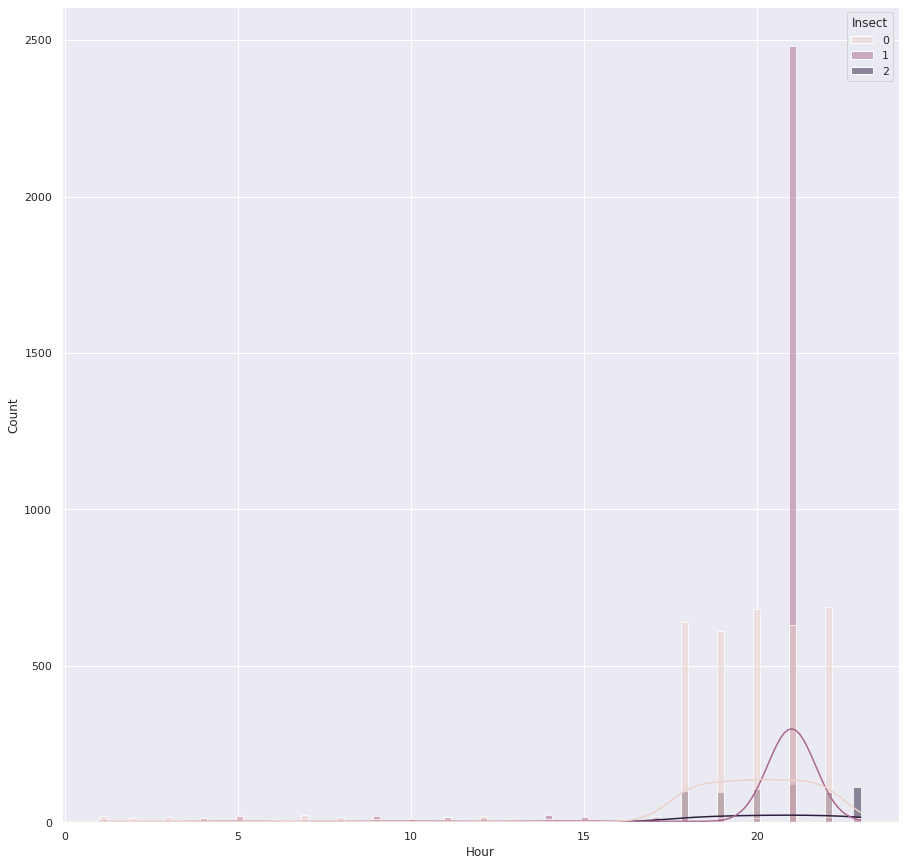

In [ ]:
sns.set(rc={'figure.figsize':(15,15)})
sns.histplot(data=df , x='Hour', hue='Insect', kde=True)

We can see how almost all insects are grouped at the night. Bearing in mind insect 2 only represents the 10%, it can be seen how at 23h, a big part of the bar corresponds to them.
It is also visible the skewness of insect 1, between 20h and 22h. Meanwhile, insect 0 seems to be most equally distributed among all night. Again, we are working with unbalanced classes!

Let's try to see the mean of the sensors for each type of insect.

In [ ]:
import os

In [ ]:
for insect in np.sort(df['Insect'].unique()):
  # Create specific folders
  cwd = "/content/drive/MyDrive/Colab Notebooks/Insects_Hackathon"
  os.makedirs(os.path.dirname(f'{cwd}/Insect_{insect}/'), exist_ok=True)
  
  print(f"\nInsect --> {insect}")

  for col in df.columns[2:-1]:
    print(f"The mean for {col} is : {np.mean(df.loc[df['Insect']==insect][col])}")
    print(f"The standard deviation for {col} is : {np.std(df.loc[df['Insect']==insect][col])}")
    # Diferent plots for each insect and column.
    sns.boxplot(df.loc[df['Insect']==insect][col])
    plt.title(f'Boxplot for {col}')
    plt.savefig(f"{cwd}/Insect_{insect}/{col}_Boxplot.png")
    plt.clf()

    sns.histplot(x=df.loc[df['Insect']==insect][col])
    plt.title(f"Histogram for {col}")
    plt.savefig(f"{cwd}/Insect_{insect}/{col}_Histogram.png")
    plt.clf()



Insect --> 0
The mean for Sensor_alpha is : -0.5399010063646679
The standard deviation for Sensor_alpha is : 99.19814061164008


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The mean for Sensor_beta is : -72.94005358748252
The standard deviation for Sensor_beta is : 125.72956306283147


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The mean for Sensor_gamma is : -0.47944243530214736
The standard deviation for Sensor_gamma is : 110.97282663068222


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The mean for Sensor_alpha_plus is : 69.6705108307462
The standard deviation for Sensor_alpha_plus is : 107.2113276125129


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The mean for Sensor_beta_plus is : -1.4821692241017
The standard deviation for Sensor_beta_plus is : 100.51486160034223


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The mean for Sensor_gamma_plus is : -1.1669437234999545
The standard deviation for Sensor_gamma_plus is : 101.11860269617637


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning



Insect --> 1
The mean for Sensor_alpha is : 1.6521728732347283
The standard deviation for Sensor_alpha is : 98.57257896296484


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The mean for Sensor_beta is : -2.6453650855824957
The standard deviation for Sensor_beta is : 126.21300826346702


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The mean for Sensor_gamma is : 4.744292613414693
The standard deviation for Sensor_gamma is : 118.90391358203858


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The mean for Sensor_alpha_plus is : -69.64013071553131
The standard deviation for Sensor_alpha_plus is : 83.24567244067784


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The mean for Sensor_beta_plus is : 1.0336086124715158
The standard deviation for Sensor_beta_plus is : 99.84236124614651


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The mean for Sensor_gamma_plus is : 1.2270712815791305
The standard deviation for Sensor_gamma_plus is : 100.53535548966933


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning



Insect --> 2
The mean for Sensor_alpha is : 0.9086559583202065
The standard deviation for Sensor_alpha is : 102.52548642096174


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The mean for Sensor_beta is : 78.68760499140316
The standard deviation for Sensor_beta is : 101.96046765842542


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The mean for Sensor_gamma is : -73.93629618850886
The standard deviation for Sensor_gamma is : 104.68281225680501


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The mean for Sensor_alpha_plus is : -0.49642049001988453
The standard deviation for Sensor_alpha_plus is : 145.96965791310626


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The mean for Sensor_beta_plus is : -4.321012054581824
The standard deviation for Sensor_beta_plus is : 98.1720909196963


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The mean for Sensor_gamma_plus is : -4.648800590678871
The standard deviation for Sensor_gamma_plus is : 97.27105100686386


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1080x1080 with 0 Axes>

We can observe how the Insect 1 boxplot for *sensor gamma* differs significantly from the others' gamma. Let's end with a violin plot comparing 3 of them to better see the distribution of the whole data.   

### Violin Plots

In [ ]:
sensor_df = df.drop(['Hour', 'Minutes'], axis=1)

In [ ]:
cwd = "/content/drive/MyDrive/Colab Notebooks/Insects_Hackathon"
os.makedirs(os.path.dirname(f'{cwd}/Violin/'), exist_ok=True)
for col in sensor_df.columns[:-1]:
  sns.violinplot(x='Insect', y=col, data=sensor_df)
  plt.title(f'Violin for {col}')
  plt.savefig(f"{cwd}/Violin/{col}_Violin.png")
  plt.clf()
  

<Figure size 1080x1080 with 0 Axes>

Well, more things to keep in mind. Sensor beta and alpha plus seem to be the ones with more differences. The rest are more or less quite similar. 



### Correlation Heatmap 

To finish the EDA, we can do a correlation plot, which will help us to detect some hidden correlations.

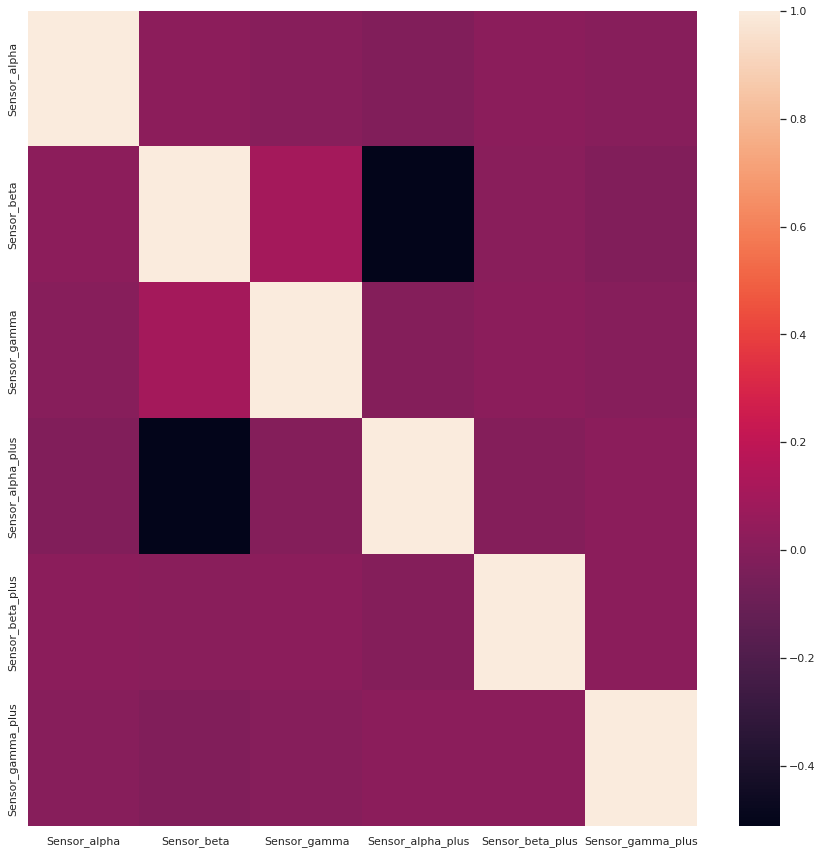

In [ ]:
corr = sensor_df.drop('Insect', axis=1).corr()
sns.heatmap(corr)

At the end of the day, we would have liked to see more stronger correlations. The only remarkable thing here seems to be the inverse correlation between alpha plus and beta. Gamma and beta also seem to be somehow connected. 

Let's plot with everything.

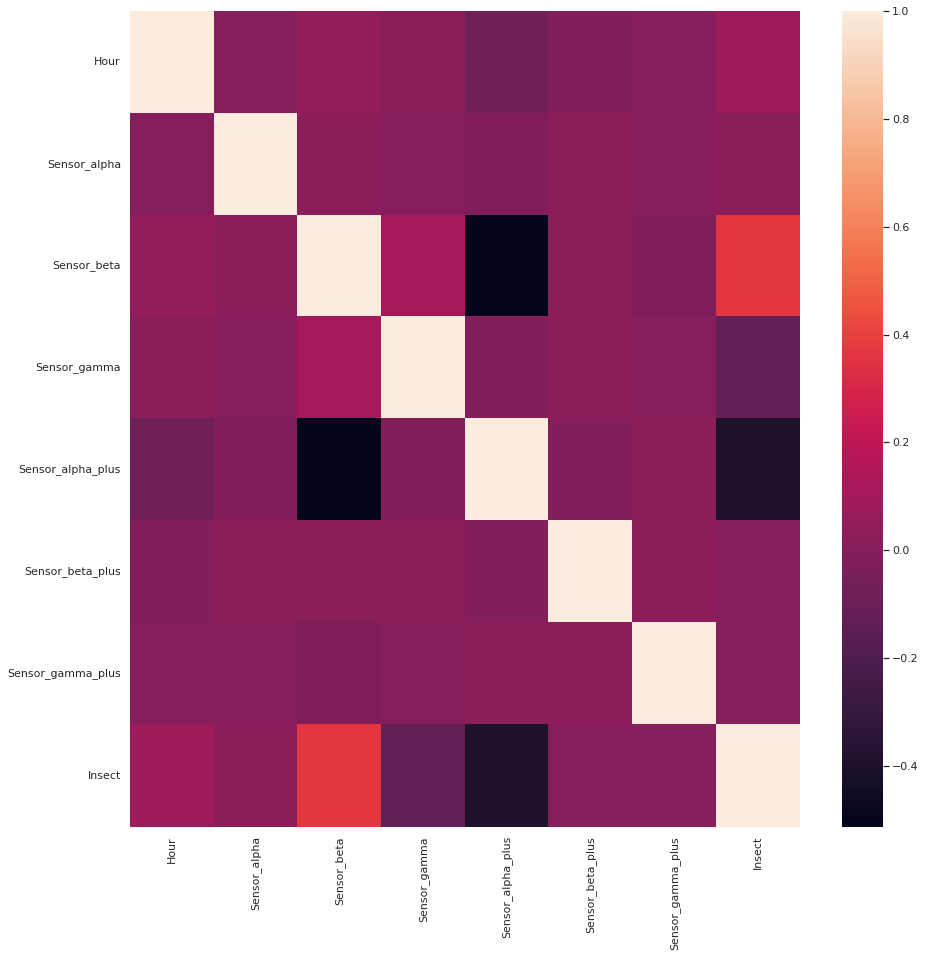

In [ ]:
corr = df.drop('Minutes', axis=1).corr()
sns.heatmap(corr)

It makes sense. As we've seen in the violin plots, beta and aplha plus were the ones which differ from the rest. Therefore, they are the ones which are given more valuable information presumptive. 

## Models

### K-Means

In [ ]:
ms = MinMaxScaler()

# kpis_fig, kpis_axs = plt.subplots(7,1, figsize=(15,15))
X = df.drop(['Hour', 'Minutes', 'Insect'], axis=1)
y = df['Insect']
# Feature Scaling
cols = X.columns
X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])
# Dimension reduction in order to plot clusters.
# X = TSNE(n_components=2, random_state=42).fit_transform(X)

# Kmeans algo
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
# Check results
labels = kmeans.labels_
# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled" % (correct_labels, y.size))
print(f"F1 Score: {f1_score(y, labels, average='weighted')}")


Result: 1037 out of 7001 samples were correctly labeled
F1 Score: 0.1865279298265909


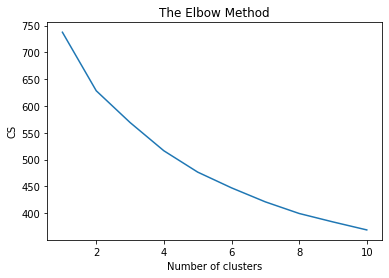

In [ ]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes:

Embed the features into 2 features using Spectral Embedding:  (7001, 2)
Embed the features into 2 features using TSNE:  (7001, 2)


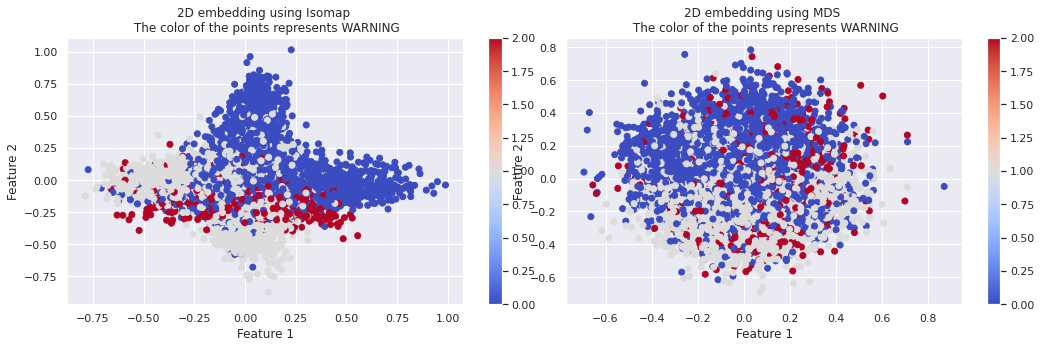

<Figure size 1080x1080 with 0 Axes>

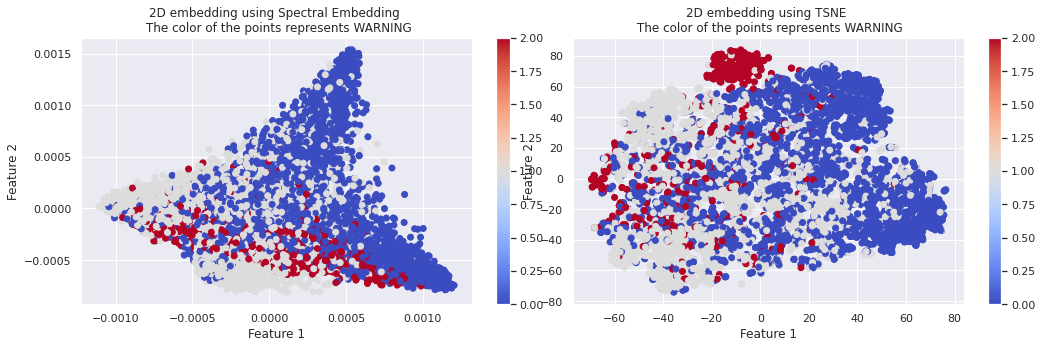

<Figure size 1080x1080 with 0 Axes>

In [ ]:
# Embed the features into 2 features using TSNE# Embed 
X_embedded_iso  = Isomap(n_components=2).fit_transform(X)
X_embedded_mds  = MDS(n_components=2, max_iter=100, n_init=1).fit_transform(X)
X_embedded_tsne = TSNE(n_components=2).fit_transform(X)
X_embedded_spec = SpectralEmbedding(n_components=2).fit_transform(X)


print('Embed the features into 2 features using Spectral Embedding: ', X_embedded_spec.shape)
print('Embed the features into 2 features using TSNE: ', X_embedded_tsne.shape)

fig = plt.figure(figsize=(15,5),facecolor='w')
plt.subplot(1, 2, 1)
plt.scatter(X_embedded_iso[:,0], X_embedded_iso[:,1], c = y, cmap = 'coolwarm')
plt.title('2D embedding using Isomap \n The color of the points represents WARNING')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.scatter(X_embedded_mds[:,0], X_embedded_mds[:,1], c = y, cmap = 'coolwarm')
plt.title('2D embedding using MDS \n The color of the points represents WARNING')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()
plt.tight_layout()

fig = plt.figure(figsize=(15,5),facecolor='w')
plt.subplot(1, 2, 1)
plt.scatter(X_embedded_spec[:,0], X_embedded_spec[:,1], c = y, cmap= 'coolwarm')
plt.title('2D embedding using Spectral Embedding \n The color of the points represents WARNING')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.scatter(X_embedded_tsne[:,0], X_embedded_tsne[:,1], c = y, cmap = 'coolwarm')
plt.title('2D embedding using TSNE \n The color of the points represents WARNING')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()
plt.tight_layout()

### Random Forest

In [4]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(np.array(df.drop('Insect',axis=1)), np.array(df['Insect']), test_size = 0.25, random_state = 42)

In [5]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


Training Features Shape: (5250, 8)
Training Labels Shape: (5250,)
Testing Features Shape: (1751, 8)
Testing Labels Shape: (1751,)


In [6]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [7]:
rf.fit(train_features, train_labels)

RandomForestClassifier(random_state=42)

In [8]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)# Calculate the absolute errors
# errors = sum(predictions==test_labels)

In [9]:
print(f"F1 Score: {f1_score(test_labels, np.round(predictions), average='weighted')}")


F1 Score: 0.8817334669619016


In [10]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

In [11]:
importances, df.drop(['Minutes', 'Insect'], axis=1).columns

(array([0.274491, 0.041494, 0.054117, 0.149268, 0.120135, 0.259938, 0.049978, 0.05058 ]),
 Index(['Hour', 'Sensor_alpha', 'Sensor_beta', 'Sensor_gamma',
        'Sensor_alpha_plus', 'Sensor_beta_plus', 'Sensor_gamma_plus'],
       dtype='object'))

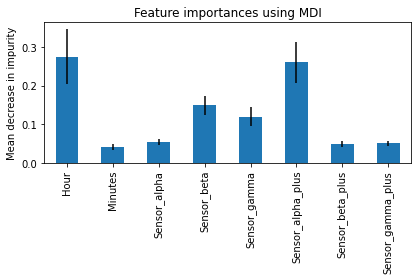

In [12]:
forest_importances = pd.Series(importances, index=df.drop(['Insect'], axis=1).columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Quite interesting how the RF is using mainly the hour, and beta and aplha plus which we noted in the EDA that have notable differences!

### kNN

In [16]:
parameters = {
    "n_neighbors": range(1, 25),
    "weights": ["uniform"],
}

# kpis_fig, kpis_axs = plt.subplots(7,1, figsize=(15,15))
X = df.drop(['Insect','Minutes'], axis=1)
y = df['Insect']
cols = X.columns
ms = MinMaxScaler()
X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])

# Split Dataset
X = TSNE(n_components=2, random_state=42).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# KNN
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train, y_train)
train_preds = gridsearch.predict(X_train)

# knn_model = KNeighborsRegressor(n_neighbors=5)
# knn_model.fit(X_train, y_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sum(y_train==train_preds)/len(y_train)
# print(f'Preision: {rmse} <--> % warnings: {sum(y_train)/len(y_train)}')
print(f"F1 Score: {f1_score(y_train, train_preds, average='weighted')}")


F1 Score: 0.7952651202549725


In [17]:
gridsearch.best_params_

{'n_neighbors': 8, 'weights': 'uniform'}

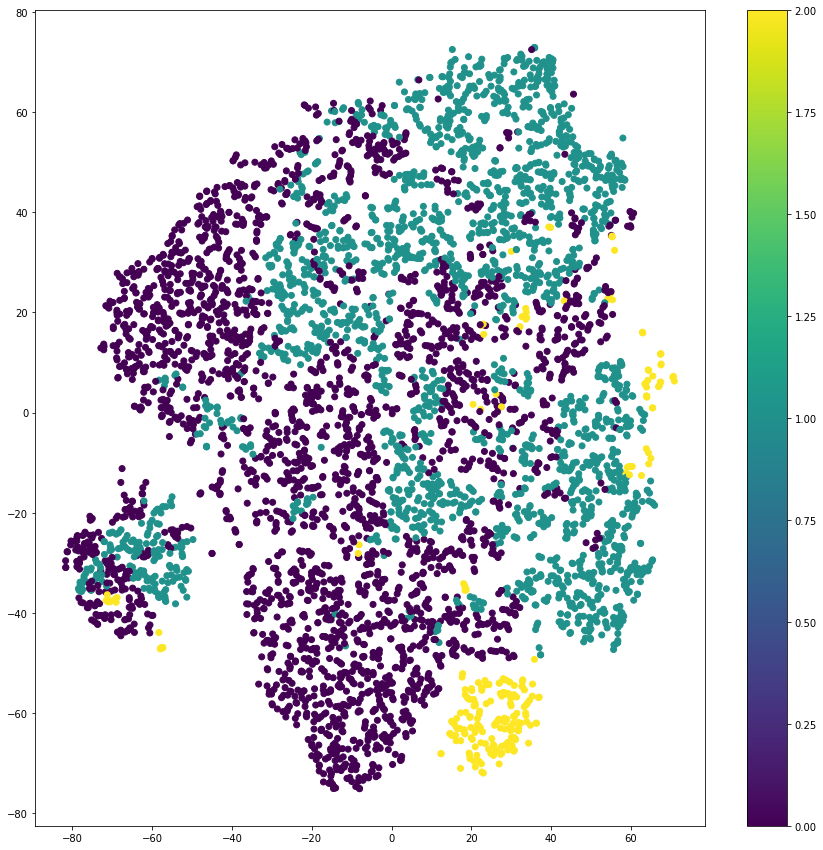

<Figure size 1080x1080 with 0 Axes>

In [18]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots(figsize=(15,15))
plt.figure(figsize=(15,15))
points = ax.scatter(
    X_train[:, 0], X_train[:, 1], c=train_preds)
f.colorbar(points)
plt.show()

As it can be seen, there are some clearly defined groups, such as Insect 0 at the bottom or the one in the right. Insect 2 seems to be well defined at the top right. In contrast, Insect 1 is distributed on the space, but giving clues of a possible group at the left or at the top.

In [19]:
test_preds = gridsearch.predict(X_test)
print(f"F1 Score: {f1_score(y_test, np.round(test_preds), average='weighted')}")

F1 Score: 0.7621991602249606


Not bad at all! Let's try to improve it since it seems to be a good model, but at the same time we might be overfitting in the train phase!

In [ ]:
def knn(X,y,reduc=False,random_state=42):
  cols = X.columns
  ms = MinMaxScaler()
  X = ms.fit_transform(X)
  X = pd.DataFrame(X, columns=[cols])


  parameters = {
    "n_neighbors": range(1, 25),
    "weights": ["uniform", "distance"],
}
  if reduc : X = TSNE(n_components=2, random_state=42).fit_transform(X)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  # KNN
  
  for k in range(1,25):
    neigh = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    neigh.fit(X, y)
    train_preds = neigh.predict(X_train)
    train_f1 = f1_score(y_train, train_preds, average='weighted')
    test_preds = neigh.predict(X_test)
    test_f1 = f1_score(y_test, test_preds, average='weighted')
    if test_f1 > 0.5:
      print(f"trainf1: {train_f1} , testf1: {test_f1} and k = {k}")

In [ ]:
X = df.drop(['Insect', 'Minutes'], axis=1)
y = df['Insect']
knn(X, y, reduc=False)

trainf1: 1.0 , testf1: 1.0 and k = 1
trainf1: 0.8830542973257292 , testf1: 0.8821530888880197 and k = 2
trainf1: 0.8769438785458703 , testf1: 0.8816199164130992 and k = 3
trainf1: 0.8558873156824005 , testf1: 0.8578722111493399 and k = 4
trainf1: 0.8455201429765623 , testf1: 0.8553247037124289 and k = 5
trainf1: 0.8339314241194485 , testf1: 0.8444359394515049 and k = 6
trainf1: 0.8321463787308719 , testf1: 0.8472465221806438 and k = 7
trainf1: 0.8250643415716832 , testf1: 0.832462751236953 and k = 8
trainf1: 0.8255210667754691 , testf1: 0.8268691763190665 and k = 9
trainf1: 0.8241700788058642 , testf1: 0.8191387081834959 and k = 10
trainf1: 0.8180016586440646 , testf1: 0.8228878916659381 and k = 11
trainf1: 0.8149131521385213 , testf1: 0.8263281726619596 and k = 12
trainf1: 0.8119591174049808 , testf1: 0.8276917662762646 and k = 13
trainf1: 0.8105677846637582 , testf1: 0.8208098741266378 and k = 14
trainf1: 0.8083011505708808 , testf1: 0.8177039467777497 and k = 15
trainf1: 0.808543445

In [ ]:
X = df.drop(['Insect', 'Minutes'], axis=1)
y = df['Insect']
knn(X, y, reduc=True)

trainf1: 1.0 , testf1: 1.0 and k = 1
trainf1: 0.8700389940365756 , testf1: 0.8799939666707752 and k = 2
trainf1: 0.860714482828312 , testf1: 0.8692600445886557 and k = 3
trainf1: 0.8367149002433405 , testf1: 0.8414997647871634 and k = 4
trainf1: 0.8295264694674315 , testf1: 0.8448766512153872 and k = 5
trainf1: 0.8193942166757447 , testf1: 0.8342700217301553 and k = 6
trainf1: 0.8132579210627038 , testf1: 0.8206844931856236 and k = 7
trainf1: 0.8021913799169751 , testf1: 0.8114669690505095 and k = 8
trainf1: 0.8005283888270749 , testf1: 0.8101228471410742 and k = 9
trainf1: 0.794067843504828 , testf1: 0.802653136095593 and k = 10
trainf1: 0.7910602010704193 , testf1: 0.7985547675992976 and k = 11
trainf1: 0.7879344500250443 , testf1: 0.7920008221414594 and k = 12
trainf1: 0.7863766843849209 , testf1: 0.7899368660739489 and k = 13
trainf1: 0.7837113768591286 , testf1: 0.7896099190390643 and k = 14
trainf1: 0.782986380140131 , testf1: 0.7852146148191989 and k = 15
trainf1: 0.779598847372

‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

In general, a k-NN model fits a specific point in the data with the N nearest data points in your training set. For 1-NN this point depends only of 1 single other point. E.g. you want to split your samples into two groups (classification) - red and blue. If you train your model for a certain point p for which the nearest 4 neighbors would be red, blue, blue, blue (ascending by distance to p). Then a 4-NN would classify your point to blue (3 times blue and 1 time red), but your 1-NN model classifies it to red, because red is the nearest point. This means, that your model is really close to your training data and therefore the bias is low.

### TEST

In [21]:
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Insects_Hackathon/test_x.csv')

In [22]:
test_df

,Unnamed: 0,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus
0,7000,21,31,-72.083585,-11.434977,-52.961743,-72.696385,145.299227,-143.856243
1,7001,21,3,-193.619980,40.137081,85.419244,-26.266801,-125.391237,80.904973
2,7002,22,31,42.578382,-51.613402,125.055611,182.136746,-9.726951,-114.913402
3,7003,21,25,-64.150951,287.306752,-70.965473,13.789738,38.187260,137.761691
4,7004,18,11,193.750787,-61.989533,-110.347066,-16.864786,148.541916,232.424616
...,...,...,...,...,...,...,...,...,...
2995,9995,3,26,-101.913083,87.337077,77.193476,-79.694034,13.273965,143.004786
2996,9996,21,6,52.424913,-37.107249,120.373905,208.090551,-135.567057,-53.867634
2997,9997,21,0,-103.295133,34.736979,-195.018118,-164.294768,-26.993064,6.063715
2998,9998,20,13,170.027159,-73.100306,-117.330651,11.353824,-3.366007,-140.113661


In [26]:
test_df.set_index('Unnamed: 0')

,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus
Unnamed: 0,,,,,,,,
7000,21,31,-72.083585,-11.434977,-52.961743,-72.696385,145.299227,-143.856243
7001,21,3,-193.619980,40.137081,85.419244,-26.266801,-125.391237,80.904973
7002,22,31,42.578382,-51.613402,125.055611,182.136746,-9.726951,-114.913402
7003,21,25,-64.150951,287.306752,-70.965473,13.789738,38.187260,137.761691
7004,18,11,193.750787,-61.989533,-110.347066,-16.864786,148.541916,232.424616
...,...,...,...,...,...,...,...,...
9995,3,26,-101.913083,87.337077,77.193476,-79.694034,13.273965,143.004786
9996,21,6,52.424913,-37.107249,120.373905,208.090551,-135.567057,-53.867634
9997,21,0,-103.295133,34.736979,-195.018118,-164.294768,-26.993064,6.063715


In [40]:
predictions = rf.predict(test_df.drop('Minutes', axis=1))# Calculate the absolute errors


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [50]:
len(predictions)

3000

In [51]:
final_df = pd.concat([test_df['Unnamed: 0'], pd.DataFrame(predictions)], axis=1)

In [52]:
final_df

,Unnamed: 0,0
0,7000,0
1,7001,0
2,7002,0
3,7003,2
4,7004,2
...,...,...
2995,9995,2
2996,9996,0
2997,9997,1
2998,9998,0


In [54]:
final_df = final_df.set_index('Unnamed: 0'); 

,0
Unnamed: 0,
7000,0
7001,0
7002,0
7003,2
7004,2
...,...
9995,2
9996,0
9997,1


In [59]:
final_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Insects_Hackathon/predictions.csv')

In [61]:
final_df.count()

Unnamed: 0    3000
0             3000
dtype: int64